# A1.5 Solución de problemas 

Para  esta  actividad  trabajaremos  con  la  base  de  datos  de  calificaciones  que  utilizamos  en  la 
lectura  interactiva  L1.1  Aprendizaje  estadístico-automático.  Nos  interesa  tratar  de  predecir  la 
calificación  final  de  estudiantes  de  un  curso,  a  partir  de  su  información  demográfica  y  sus 
calificaciones de los primeros dos periodos. 
 
Utilizaremos el archivo de nombre “A1.5 Calificaciones.csv”, donde podrás encontrar información 
para  395  estudiantes,  con  10  variables  en  total.  Los  datos  se  descargaron  del  Student 
Performance  Data  Set  en  el  UCI  Machine  Learning  Repository,  y  podrás  encontrar  más 
información sobre los mismos en el siguiente enlace. 
 
La base de datos cuenta con la siguiente información: <br>
 “Escuela”. Indica si el estudiante en cuestión asistía a la escuela Gabriel Pereira (GP) o
a la escuela Mousinho da Silveira (MS). <br>
 “Sexo”. F para mujeres y H para hombres. <br>
 “Edad”. Edad del estudiante, en años. <br>
 “HorasDeEstudio”. Cantidad de horas de estudio: 1 indica menos de dos horas, 2 
indica de dos a cinco horas, 3 indica de cinco a diez horas, 4 indica más de diez horas.<br> 
 “Reprobadas”. Indica la cantidad de materias reprobadas previamente. <br>
 “Internet”. Si el estudiante tenía acceso (yes) o no (no) a internet en su casa.<br> 
 “Faltas”. Cantidad de veces que faltó a clases. <br>
 “G1”. Calificación del primer periodo, escala del 0 al 20. <br>
 “G2”. Calificación del segundo periodo, escala del 0 al 20. <br>
 “G3”. Calificación final, escala del 0 al 20.  <br>

Desarrolla  los  siguientes  puntos  en  una Jupyter  Notebook,  tratando,  dentro  de  lo  posible,  que 
cada  punto  se  trabaje  en  una  celda  distinta.  Los  comentarios  en  el  código  siempre  son 
bienvenidos, de preferencia, aprovecha el markdown para generar cuadros de descripción que 
ayuden al lector a comprender el trabajo realizado.

1. Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo. Este archivo 
lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola 
el tipo de dato de cada variable del data frame. 

In [54]:
import pandas as pd

df = pd.read_csv("A1.5 Calificaciones.csv")

print(df.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles 
para generar un modelo de regresión lineal múltiple. Presta especial atención a variables 
que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los 
números  representan  una  clase).  Imprime  las  primeras  5  observaciones  de  la  base  de 
datos  modificada,  demostrando  que  las  variables  cualitativas  desaparecieron  y  fueron 
reemplazadas por variables adecuadas.

In [55]:
dummyEscuela = pd.get_dummies(df["Escuela"], drop_first=True)
df = pd.concat([df, dummyEscuela], axis=1)
df.drop("Escuela", axis=1, inplace=True)

dummySexo = pd.get_dummies(df["Sexo"], drop_first=True)
dummySexo.columns = ["Sexo_Masculino"]
df = pd.concat([df, dummySexo], axis=1)
df.drop("Sexo", axis=1, inplace=True)

dummyHoras = pd.get_dummies(df["HorasDeEstudio"], drop_first=True)
dummyHoras.columns = ["Estudio_Bajo", "Estudio_Medio", "Estudio_Alto"]
df = pd.concat([df, dummyHoras], axis=1)
df.drop("HorasDeEstudio", axis=1, inplace=True)

dummyInternet = pd.get_dummies(df["Internet"], drop_first=True)
dummyInternet.columns = ["Internet"]
df.drop("Internet", axis=1, inplace=True)
df = pd.concat([df, dummyInternet], axis=1)

print(df.head(5))

   Edad  Reprobadas  Faltas  G1  G2  G3     MS  Sexo_Masculino  Estudio_Bajo  \
0    18           0       6   5   6   6  False           False          True   
1    17           0       4   5   5   6  False           False          True   
2    15           3      10   7   8  10  False           False          True   
3    15           0       2  15  14  15  False           False         False   
4    16           0       4   6  10  10  False           False          True   

   Estudio_Medio  Estudio_Alto  Internet  
0          False         False     False  
1          False         False      True  
2          False         False      True  
3           True         False      True  
4          False         False     False  


3. Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3. 
Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las características  de  dichas  observaciones,  agrega  una  línea  de  texto  que  describa  qué planeas hacer con dichos valores  y  por qué.  Realiza  la  acción  descrita  en  caso de  ser necesario.

In [56]:
import numpy as np
q1 = df.Faltas.quantile(0.25)
q3 = df.Faltas.quantile(0.75)
iqr = q3 - q1
li = q1 - 3 * iqr
ls = q3 + 3 * iqr
out = np.where((df.Faltas <= li) | (df.Faltas >= ls))[0]
print(df.iloc[out, :])

# Tras revisar las observaciones atípicas, se observa que los valores extremos de "Faltas" pueden influir negativamente en el modelo. 
# Por lo tanto, se eliminarán estas observaciones.

df = df.drop(out).reset_index(drop=True)

     Edad  Reprobadas  Faltas  G1  G2  G3     MS  Sexo_Masculino  \
74     16           0      54  11  12  11  False           False   
183    17           0      56   9   9   8  False           False   
276    18           0      75  10   9   9  False           False   
307    19           1      38   8   9   8  False            True   
315    19           1      40  13  11  11  False           False   

     Estudio_Bajo  Estudio_Medio  Estudio_Alto  Internet  
74           True          False         False      True  
183          True          False         False      True  
276          True          False         False      True  
307         False          False         False      True  
315         False           True         False      True  


4. Genera una matriz de correlaciones para encontrar potenciales problemas de 
colinealidad.  Genera  un  heatmap  para  visualizar  de  forma  más  sencilla  los  resultados. 
Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento 
en una línea de texto. Realiza la acción descrita en caso de ser necesario. 


4 5
0.9047966735871248
Las variables G1, G2 y G3 están altamente correlacionadas, por lo que se eliminará una de ellas.


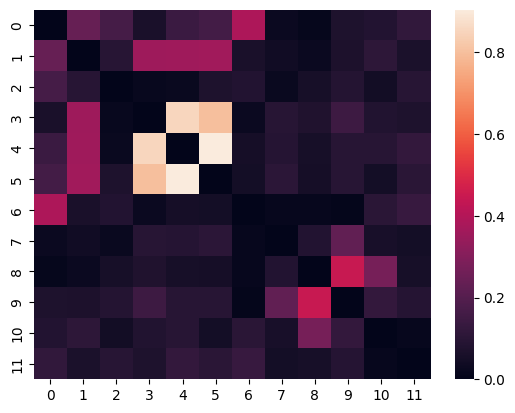

In [57]:
cor = df.corr().abs().values
np.fill_diagonal(cor, 0)

i, j = np.unravel_index(cor.argmax(), cor.shape)

print(i, j)
print(cor[i, j])

from seaborn import heatmap

heatmap(cor)

print("Las variables G1, G2 y G3 están altamente correlacionadas, por lo que se eliminará una de ellas.")

df = df.drop(["G1"], axis=1)

5. Incluye términos de interacción para al menos dos pares de variables,  las que te llame 
más la atención analizar con esta metodología. Trata de evitar incluir interacciones para 
todos los pares de variables posibles. Imprime en consola las primeras 5 observaciones 
de la base de datos con los nuevos términos.

In [58]:
# 1. Faltas * Reprobadas
df["Reprobadas_Faltas"] = df["Reprobadas"] * df["Faltas"]

# 2. G3 * Faltas
df["G3_Faltas"] = df["G3"] * df["Faltas"]

# Mostramos las primeras 5 observaciones con los nuevos términos
print(df.head(5))

   Edad  Reprobadas  Faltas  G2  G3     MS  Sexo_Masculino  Estudio_Bajo  \
0    18           0       6   6   6  False           False          True   
1    17           0       4   5   6  False           False          True   
2    15           3      10   8  10  False           False          True   
3    15           0       2  14  15  False           False         False   
4    16           0       4  10  10  False           False          True   

   Estudio_Medio  Estudio_Alto  Internet  Reprobadas_Faltas  G3_Faltas  
0          False         False     False                  0         36  
1          False         False      True                  0         24  
2          False         False      True                 30        100  
3           True         False      True                  0         30  
4          False         False     False                  0         40  


6. Entrena  un  modelo  de  regresión  lineal  múltiple  en  un  subconjunto  de  datos  que 
corresponda  al  80%  de  los  datos  totales  e  imprime  en  consola  un  resumen  de  los 
resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final 
del  20%  de  las observaciones  que  no  se  usaron  para  entrenar.  Genera  una  gráfica  de 
dispersión de las calificaciones finales reales contra las calificaciones finales estimadas 
por  el  modelo  en  los  datos  de  prueba.  Agrega  una  línea  de  texto  donde  des  una 
conclusión sobre los resultados del modelo, con base en la información  que se muestra 
en la gráfica.

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          2.18e-110
Time:                        19:35:39   Log-Likelihood:                -636.30
No. Observations:                 312   AIC:                             1299.
Df Residuals:                     299   BIC:                             1347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1712      1.71

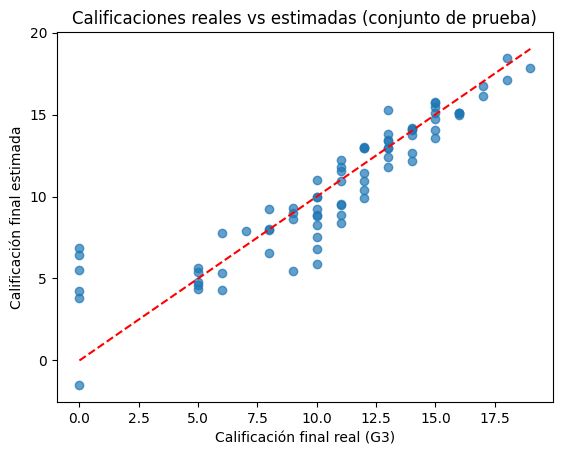

Conclusión: La dispersión muestra que el modelo logra capturar la tendencia general de las calificaciones finales, aunque existen desviaciones para algunos casos. Esto sugiere que el modelo tiene capacidad predictiva, pero podría mejorarse con ajustes adicionales o variables relevantes.


In [60]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Definir variables predictoras y variable objetivo
X = df.drop("G3", axis=1)
y = df["G3"]

# Separar en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal múltiple
X_train_const = sm.add_constant(X_train)

X_train_const = X_train_const.copy()
for col in X_train_const.select_dtypes(include='bool').columns:
    X_train_const[col] = X_train_const[col].astype(int)

model = sm.OLS(y_train, X_train_const).fit()

# Imprimir resumen del modelo
print(model.summary())

# Predicción en el conjunto de prueba
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

# Gráfica de dispersión: reales vs estimados
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Calificación final real (G3)")
plt.ylabel("Calificación final estimada")
plt.title("Calificaciones reales vs estimadas (conjunto de prueba)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

print("Conclusión: La dispersión muestra que el modelo logra capturar la tendencia general de las calificaciones finales, aunque existen desviaciones para algunos casos. Esto sugiere que el modelo tiene capacidad predictiva, pero podría mejorarse con ajustes adicionales o variables relevantes.")